In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data1= pd.read_csv(r'C:\Users\karthik\Downloads\improved-dataset\improved-dataset\turnstile_weather_v2.csv')

In [3]:
data=pd.read_csv(r'C:\Users\karthik\Downloads\turnstile_data_master_with_weather.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder'], dtype='object')

In [5]:
data.head(5)

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


In [6]:
check1=data[['UNIT', 'DATEn', \
             'TIMEn', 'Hour',  \
             'DESCn', 'ENTRIESn_hourly']]

In [7]:
check1.head(5)

,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly
0,R001,2011-05-01,01:00:00,1,REGULAR,0
1,R001,2011-05-01,05:00:00,5,REGULAR,217
2,R001,2011-05-01,09:00:00,9,REGULAR,890
3,R001,2011-05-01,13:00:00,13,REGULAR,2451
4,R001,2011-05-01,17:00:00,17,REGULAR,4400


In [8]:
rain_days= data[['DATEn','ENTRIESn_hourly']][data['rain']==1]
no_rain= data[['DATEn','ENTRIESn_hourly']][data['rain']==0]

In [9]:
data.columns

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder'], dtype='object')

In [12]:
def normalise(nom):
    mean=nom.mean()
    stdev=nom.std()
    normalize_feature=(nom-mean)/stdev
    return mean,stdev,normalize_feature

In [13]:
def recovery(mean,stdev,nor_intercept,nor_params):
    intercept=nor_intercept-np.sum((mean*nor_params)/stdev)
    params=(nor_params/stdev)
    return intercept, params
    

In [14]:
def regression(normalize_feature,value):
    #Y=data['ENTRIESn_hourly']
    features1=sm.add_constant(normalize_feature)
    model=sm.OLS(value,features1)
    result=model.fit()
    nor_intercept=result.params[0]
    nor_params=result.params[1:]
    return nor_intercept,nor_params,result


In [15]:
def prediction (data):
    features=data[['fog','maxtempi']]
    dummy_unit = pd.get_dummies(data['UNIT'],prefix='unit')
    dummy_unit_hr=pd.get_dummies(data['Hour'],prefix='hour')
    features=features.join(dummy_unit.ix[:,1:])
    features=features.join(dummy_unit_hr.ix[:,1:])
    value=data['ENTRIESn_hourly']
    #numpy_arrays
    #features_array=features.values
    #values_array=value.values
    mean,stdev,normalize_feature=normalise(features)    
    nor_intercept,nor_params,result=regression(normalize_feature,value)
    intercept,params=recovery(mean,stdev,nor_intercept,nor_params)
    prediction= intercept+np.dot(features,params)
    e=prediction-value
    return prediction,result,e

In [16]:
orginal,result,e=prediction(data)


(-8000, 8000)

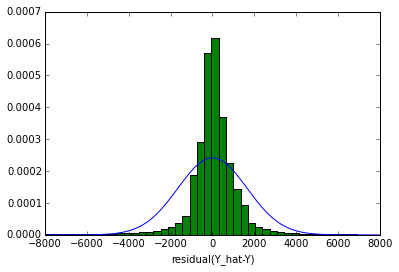

In [17]:
#x = np.linspace(-3*sigma,+3*sigma)
#plt.plot(x,stats.norm.pdf(x, 0, sigma),'r-', lw=5, alpha=0.6, label='Normal Density')
h=sorted(e)
fit = stats.norm.pdf(h, 0, np.std(h))
plt.plot(h,fit)
plt.hist(h,normed=True,bins=150)
plt.xlabel('residual(Y_hat-Y)')
plt.xlim(-8000,8000)


In [18]:
e.std()

1650.4510867453619

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     270.2
Date:                Tue, 22 Sep 2015   Prob (F-statistic):               0.00
Time:                        15:32:45   Log-Likelihood:            -1.1648e+06
No. Observations:              131951   AIC:                         2.331e+06
Df Residuals:                  131461   BIC:                         2.335e+06
Df Model:                         489                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1095.3485      4.552    240.630      0.0